In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
from os import path
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import yaml

from plot import plot

%matplotlib inline

In [3]:
groups = yaml.load(open('comparison_groups.yml'))

In [ ]:
bbox_to_anchor=[-0.1, 1.1],

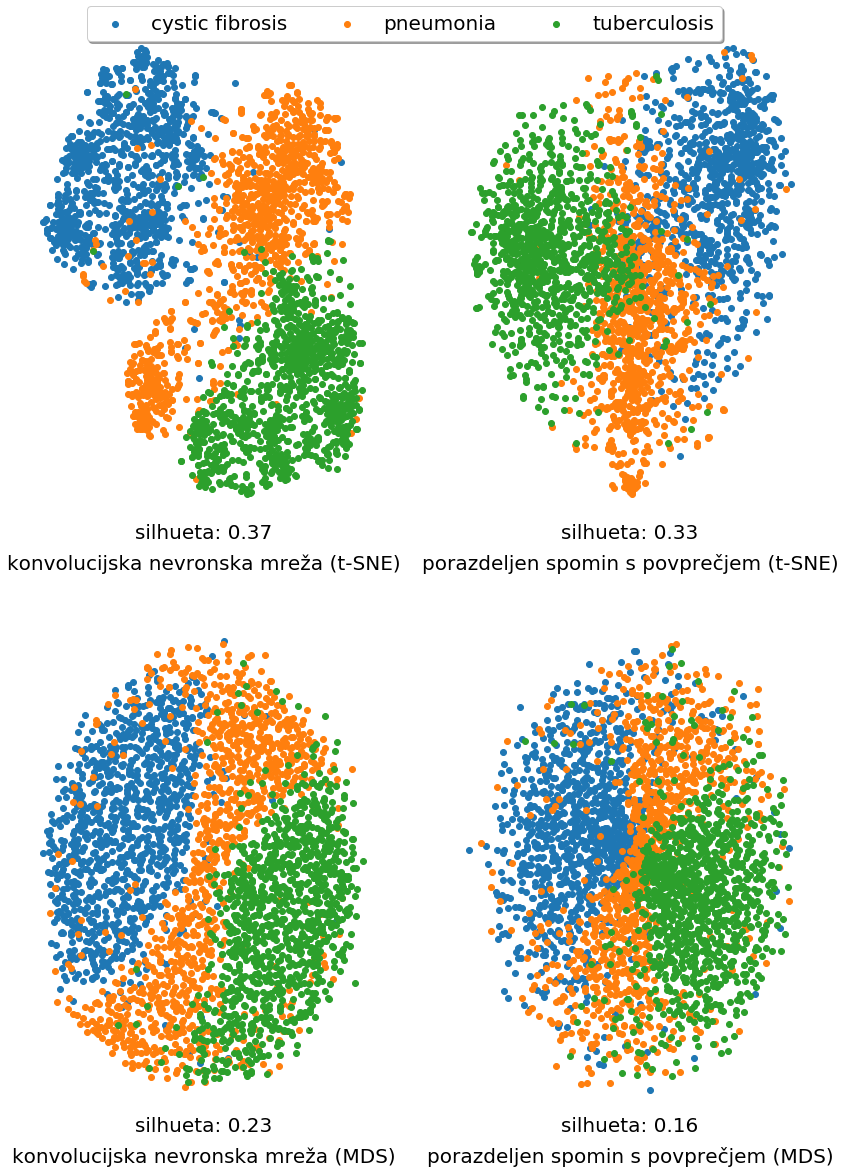

In [46]:
for group in groups:
    group = 'antigens, cd'
    group = 'endoscopy'
    group = 'gases'
    group = 'lung diseases'
    
    dfs = [
        (pd.read_csv('embeddings_2d/convnet-tsne/%s.csv' % (group)), 'konvolucijska nevronska mreža (t-SNE)'),
        (pd.read_csv('embeddings_2d/doc2vec-tsne/%s.csv' % (group)), 'porazdeljen spomin s povprečjem (t-SNE)'),
        (pd.read_csv('embeddings_2d/convnet-mds/%s.csv' % (group)), 'konvolucijska nevronska mreža (MDS)'),
        (pd.read_csv('embeddings_2d/doc2vec-mds/%s.csv' % (group)), 'porazdeljen spomin s povprečjem (MDS)'),
    ]
    
    if len(dfs) == 2:
        fig, axes = plt.subplots(1, 2)
        fig.set_size_inches(16, 12)
    else:
        fig, axes = plt.subplots(2, 2)
        fig.set_size_inches(14, 20)

    axes = axes.flatten()
    for ax, (df, name) in zip(axes, dfs):
        plot(ax, df)
        ax.text(0.5, -0.1, name,
                size='20', ha="center",
                transform=ax.transAxes)
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))

    plt.legend(by_label.values(), by_label.keys(),
               loc="upper center", bbox_to_anchor = (0,-0.1,1,1),
               bbox_transform = plt.gcf().transFigure,
       ncol=3, shadow=True, fancybox=True, fontsize='20')

    filepath = path.join('visualizations', group + '.png')
    fig.savefig(filepath)
    
    break